# Computer Assignment 2

## Student names and student numbers:
- Theo Koenig (4922301)
- Tip ten Brink (4927192)

**General TA feedback:**

## === Section 1 : The Saha Equation ===

In [1]:
from IPython.display import display, Math, Latex

### Exercise 1

**Grade: x/8**

**TA Feedback:**

$$\require{mhchem}$$
We know that at equilibrium:
$0 = dG = \sum_i{\mu_idN_i}$

Therefore we find that for an equilibrium equation of a single hydrogen atom to a single electron and proton, the chemical potentials, $\mu_{i}$, must be balanced as such:
$\mu_{H} = \mu_{e^-}+\mu_{p}$

Then, using the chemical potential of an ideal gas mixture we find
\begin{equation}
-k_B T  \ln{\left( \frac{1}{n_H} \left( \frac{2\pi m_H k_B T}{h^2} \right) ^{3/2}\right)} - I = -k_{B}T  \ln{\left(\frac{1}{n_e} \left( \frac{2\pi m_e k_B T}{h^2} \right) ^{3/2} \right)} -k_{B}T \ln{\left(\frac{1}{n_p} \left( \frac{2\pi m_p k_B T}{h^2} \right) ^{3/2} \right)}.
\end{equation}

This can be simplified to:
\begin{equation}
\ln \left( {\frac{1}{n_H} \left( \frac{2 \pi m_H k_B T}{h^2} \right) ^{3/2} n_e \left( \frac{2 \pi m_e k_B T}{h^2} \right) ^{-3/2} n_p  \left( \frac{2 \pi m_p k_B T}{h^2} \right) ^{-3/2}} \right) = -\frac{I}{k_B T}
\end{equation}

Taking $m_H = m_p$ and given $\frac{n_e n_p}{n_H} = \frac{n_e^2}{n_H}$, we then find
\begin{equation}
\ln{\frac{n_e^2}{n_H} \left( \frac{h^2}{2 \pi m_e k_B T} \right) ^{3/2}} = -\frac{I}{k_B T}.
\end{equation}

From which it follows

\begin{equation}
\frac{n_e^2}{n_H} = \left( \frac{2 \pi m_e k_B T}{h^2} \right)^{3/2} \cdot e^{\frac{-I}{k_B T}}.
\end{equation}

Given that $\gamma = \frac{\hbar^2}{2m_e} = 13.6 eV$, we then finally obtain

\begin{equation}
\frac{n_e^2}{n_H} = \left( \frac{k_B T}{4 \pi \gamma} \right)^{3/2} \cdot e^{\frac{-I}{k_B T}}.
\end{equation}


[    0   100   200   300   400   500   600   700   800   900  1000  1100
  1200  1300  1400  1500  1600  1700  1800  1900  2000  2100  2200  2300
  2400  2500  2600  2700  2800  2900  3000  3100  3200  3300  3400  3500
  3600  3700  3800  3900  4000  4100  4200  4300  4400  4500  4600  4700
  4800  4900  5000  5100  5200  5300  5400  5500  5600  5700  5800  5900
  6000  6100  6200  6300  6400  6500  6600  6700  6800  6900  7000  7100
  7200  7300  7400  7500  7600  7700  7800  7900  8000  8100  8200  8300
  8400  8500  8600  8700  8800  8900  9000  9100  9200  9300  9400  9500
  9600  9700  9800  9900 10000]


C:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


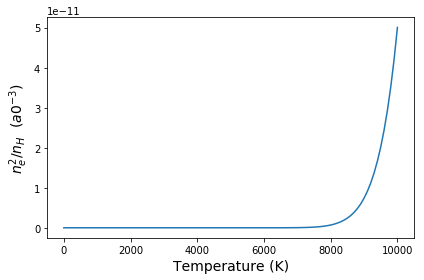

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants used
pi = np.pi
a0 = 0.529e-10 # m
hbar2_d_2me = 13.6 # eV a0^2
gamma = hbar2_d_2me
k_B = 8.617e-5 # eV K^-1 Boltzmann constant
I = 13.6 # eV ionization potential of the hydrogen atom

T_start = 0 # start at zero results in a divide_by_zero_error
T_end = 10000
T_step = 100
T = np.arange(T_start, T_end+T_step, T_step)

def saha(T):
    return ((k_B*T)/(4*pi*gamma))**1.5 * np.exp(-I/(k_B*T))

ne2_d_nH = saha(T)

plt, ax = plt.subplots(figsize=(6,4))
ax.plot(T, ne2_d_nH)
ax.set_xlabel('Temperature (K)', fontsize=14)
ax.set_ylabel(r'$n_e^2/n_H$ '+' $(a0^{-3})$', fontsize=14) #Missing units
plt.tight_layout()

Explain why using these units makes sense

### Exercise 2

**Grade: x/9**

**TA Feedback:**

The derivation of 

\begin{equation}
\frac{\zeta^2}{1-\zeta}  = f(T)
\end{equation}

is shown as follows:

Given the ionization fractions as

\begin{equation}
\zeta = \frac{n_p}{n_p + n_H},
\end{equation}


with 

\begin{equation}
f(T) = \frac{1}{n_0}\left( \frac{2 \pi m_e k_B T}{h^2} \right)^{3/2} \cdot e^{\frac{-I}{k_B T}} = \frac{1}{n_0}\frac{n_e^2}{n_H},
\end{equation}

where $n_0 = n_p + n_H$, it follows that:

\begin{equation}
\frac{\zeta^2}{1-\zeta}  = \left( \frac{n_p}{n_p + n_H} \right)^2 \left( \frac{1}{1 - \frac{n_p}{n_p + n_H}} \right) = \frac{n_p^2}{(n_p + n_H)^2 - (n_p + n_H)n_p} = \frac{n_p^2}{n_H(n_p + n_H)} = \frac{1}{n_0}\frac{n_p^2}{n_H} = \frac{1}{n_0}\frac{n_e^2}{n_H} = f(T)
\end{equation}

$\zeta(T)$ can then be found by simply rearranging the above into a quadratic equation

\begin{equation}
\zeta(T)^2 + \zeta(T) f(T) - f(T) = 0.
\end{equation}

Which leads to our final equation for $\zeta(T)$

\begin{equation}
\zeta(T) = \frac{-f(T)+\sqrt{f(T)^2 + 4f(T)}}{2},
\end{equation}

and this is plotted below.

C:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


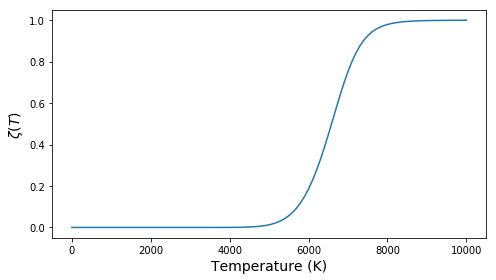

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# constants
a0 =0.529e-10 #m
n0 = 1e17*a0**3 #a0

f = saha(T)/n0

zeta = (-f + np.sqrt(f ** 2 + 4 * f)) / 2

plt, ax = plt.subplots(figsize=(7,4))
ax.plot(T, zeta)
ax.set_xlabel('Temperature (K)', fontsize=14)
ax.set_ylabel('$\zeta(T)$', fontsize=14) #No units
plt.tight_layout()

### Exercise 3

**Grade: x/4**

**TA Feedback:**

The temperature at which $\zeta < 0.01$ is first crossed indicates the temperature where the vast majority of protons had formed hydrogen atoms. This has been found below through simply iterating through the values of $\zeta(T)$ until the threshold was first met.

The decoupling temperature at which ζ < 0.01 is: 4900 K


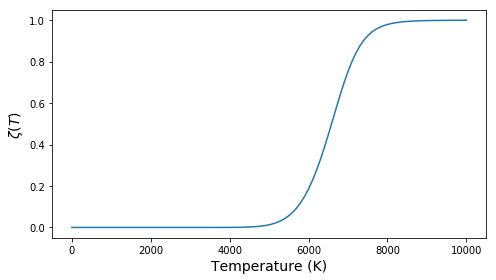

In [6]:
import matplotlib.pyplot as plt


Temperature = 0


for i in range(0,len(T)):
    if zeta[len(T)-1-i] <= 0.01:
        Temperature += 10000-i*100
        break

print("The decoupling temperature at which ζ < 0.01 is: " +str(Temperature)+" K")
        
plt, ax = plt.subplots(figsize=(7,4))
ax.plot(T, zeta)
ax.set_xlabel('Temperature (K)', fontsize=14)
ax.set_ylabel(r'$\zeta(T)$', fontsize=14) #No units
plt.tight_layout()

The decoupling temperature was found to be $T = 4900 K$.

### Exercise 4

**Grade: x/8**

**TA Feedback:**

In a two-state system of ground state and ionized state of hydrogen we find that at chemical equilibrium their respective chemical potentials $\mu_1 = \mu_2 = \mu$ must be equal. By using the given equation for $\mu_H = \mu_2$ and $\mu_H + I = \mu_1$ (with $I = 13.6 eV$), and then solving for $n_1$ and $n_2$, we obtain: 

\begin{equation}
n_1 = \left( \frac{2 \pi m_H k_B T}{h^2} \right)^{3/2} e^{\frac{\mu}{k_B T}}
\end{equation}

and 

\begin{equation}
n_2 = \left( \frac{2 \pi m_H k_B T}{h^2} \right)^{3/2} e^{\frac{\mu + I}{k_B T}}.
\end{equation}

Then the ionization fraction can simply be found as:

\begin{equation}
\zeta(T) = \frac{n_1}{n_1 + n_2} = \frac{1}{1+e^{\frac{I}{k_B T}}}.
\end{equation}

C:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


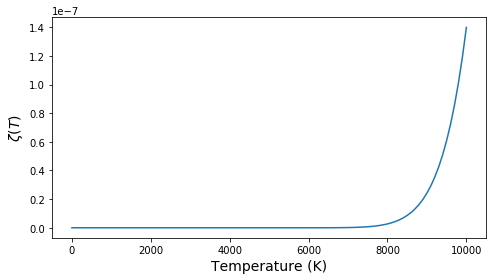

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# constants
I = 13.6 # eV
k_B = 8.617e-5 #eV K^-1

zeta_2 = 1 / (1 + np.exp(I / (k_B * T)))

plt, ax = plt.subplots(figsize=(7,4))
ax.plot(T, zeta_2)
ax.set_xlabel('Temperature (K)', fontsize=14)
ax.set_ylabel('$\zeta(T)$', fontsize=14) #No units
plt.tight_layout()

Your explanation

## === Section 2 : Car Battery ===

### Exercise 5

**Grade: x/6**

**TA Feedback:**

Your explanation

In [6]:
#Put your code here

Your explanation

### Exercise 6

**Grade: x/8**

**TA Feedback:**

Your explanation

In [7]:
#Put your code here

Your explanation

### Exercise 7

**Grade: x/8**

**TA Feedback:**

Your explanation

In [8]:
#Put your code here

Your explanation

### Exercise 8

**Grade: x/8**

**TA Feedback:**

Your explanation

In [9]:
#Put your code here

Your explanation

### Exercise 9

**Grade: x/6**

**TA Feedback:**

Your explanation

In [10]:
#Put your code here

Your explanation

## === Section 3 : Monte Carlo simulation ===

### Exercise 10

**Grade: x/5**

**TA Feedback:**

We know
$$\mathcal{P}(s) = \frac{1}{Z}e^{E(s)/kT}$$ and
$$Z = \sum_s{e^{E(s)/kT}}$$

We measure the energies $E_1$ for state $s_1$ and $E_2$ for state $s_2$
in units of $kT$. So we have
$$Z = e^{-E_1} + e^{-E_2}$$

This gives us for the probabilities:

$$p_1 = \mathcal{P}(s_1) = \frac{e^{-E_1}}{e^{-E_1} + e^{-E_2}}$$
$$p_2 = \mathcal{P}(s_2) = \frac{e^{-E_2}}{e^{-E_1} + e^{-E_2}}$$

In [11]:
#Put your code here

Your explanation

### Exercise 11

**Grade: x/8**

**TA Feedback:**

The flow from state 1 to 2 in a time step $T$ is given by the probability of being in state 1, $p_1$,
times the probability of going to state 2 in a time step if a particle is in state 1, $T_{1,2}$.
The flow from state 2 to 1 is similar, so $p_2 T_{2,1}$.

For the case $p_1 < p_2$, $T_{1,2} = 1$ and $T_{2,1} = p_1 / p_2$, so we then have as a net flow from 1 to 2:

$$p_1 T_{1,2} - p_2 T_{2,1} = p_1 - p_2 \frac{p_1}{p_2} = 0$$

For the case $p_2 \leq p_1$, $T_{1,2} = p_2 / p_1$ and $T_{2,1} = 1$, so:

$$p_1 T_{1,2} - p_2 T_{2,1} = p_1 \frac{p_2}{p_1} - p_2 = 0$$

So we see that if the states are occupied with probabilities $p_1$, $p_2$, there is no
net flow.

In [1]:
#Put your code here

This is a further test of the mergetool, blabla.

### Exercise 12

**Grade: x/3**

**TA Feedback:**

Your explanation

In [13]:
#Put your code here

Your explanation

### Exercise 13

**Grade: x/19**

**TA Feedback:**

Your explanation

In [14]:
#Put your code here

Your explanation